### You are given a bike rental dataset. The dataset contains temperature information and the bike rental for the given temperature. Build a Simple Linear Regression model to predict the bike rental, given a temperature.

### Step1: Import dataset and do necessary cleaning

In [20]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Load the dataset
df = pd.read_csv("C:\\Users\\pushkals\\OneDrive - Durham College\\AI\\Sem-1\\AI Algorithms I (AIDI 1002)\\Submissions\\Lab-1\\bike_rental.csv")
df.head()

,Date,Rented Bike Count,Temperature(C)
0,01/12/2017,254,-5.2
1,01/12/2017,204,-5.5
2,01/12/2017,173,-6.0
3,01/12/2017,107,-6.2
4,01/12/2017,78,-6.0


In [22]:
#Drop Date Column
df.drop(["Date"], axis=1, inplace= True)
df.head()

,Rented Bike Count,Temperature(C)
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0


### Step 2: Model Building

In [23]:
#Define x and y variable
x=df['Temperature(C)'].to_numpy()
y=df['Rented Bike Count'].to_numpy()

#Create Train and Test Datasets with 8:2 ratio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

#Convert x variables to 2D if necessary
x_train2 = x_train.reshape(-1,1)
x_test2 = x_test.reshape(-1,1)

#Fit a Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train2, y_train)

 
#Find the model parameters
print('\nIntercept: {:0.2f}'.format(float(regressor.intercept_)))
print('Coefficient: {:0.2f}'.format((float(regressor.coef_))))


Intercept: 333.12
Coefficient: 28.64


### Step 3: Model Evaluation 

In [24]:
#Find the RMSE and r2 of the model
from sklearn import metrics
predict = regressor.predict(x_test2)
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))


R2: 0.30
Root Mean Squared Error: 547.62


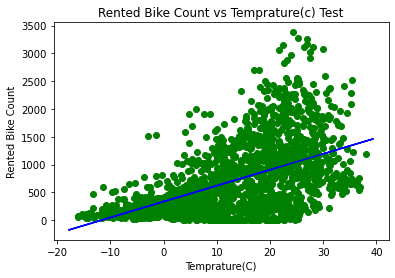

In [28]:
#Plot a scatter plot with test dataset and the trained model

plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_train2, regressor.predict(x_train2), color = 'blue')
plt.title('Rented Bike Count vs Temprature(c) Test')
plt.xlabel('Temprature(C)')
plt.ylabel('Rented Bike Count')
plt.show()


### Step 4: Model Generalization

In [26]:
#Save model to disk
import pickle
pickle.dump(regressor, open('model.pkl','wb'))

In [27]:
#Make prediction using saved model on Temperature -6
model = pickle.load( open('model.pkl','rb'))
print(model.predict([[-6]]))

[161.26316341]
